<a href="https://colab.research.google.com/github/Javi-GH2005/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_04_Crea_tu_primera_estrategia_de_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Crea tu primera estrategia de trading


### Resumen
* Gestionar los datos
* Media móvil
* Estrategia
* Gráfico
* Calcular el beneficio
* Automatización
* Comparar la estrategia con datos procedentes de diferentes fuentes

<br>



💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [60]:
!pip install yfinance

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [62]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

#  Gestionar los datos



In [63]:
# Función de preprocesado

def preprocessing(name):

  # Importar los datos
  df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True).dropna()

  # Eliminar las últimas dos columnas
  df = df.iloc[:,:-2]

  # Renombrar
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time"

  return df

In [64]:
def preprocessing_yf(symbol):

  #Importar los datos
  df = yf.download(symbol, period="max").dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time"

  return df

In [65]:
df = preprocessing_yf("EURUSD=X")
len(df)

[*********************100%***********************]  1 of 1 completed


5699

In [66]:
df

,open,high,low,close,volume
time,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2025-11-11,1.155722,1.160631,1.154814,1.155735,0
2025-11-12,1.158749,1.159797,1.156323,1.158883,0
2025-11-13,1.159219,1.164931,1.157984,1.159245,0


# Media móvil

In [67]:
# Crear media móvil simple de 30 días
df["SMA fast"] = df["close"].rolling(30).mean()

# Crear media móvil simple de 60 días
df["SMA slow"] = df["close"].rolling(60).mean()
df

,open,high,low,close,volume,SMA fast,SMA slow
time,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,NaN,NaN
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,NaN,NaN
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,NaN,NaN
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,NaN,NaN
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,NaN,NaN
...,...,...,...,...,...,...,...
2025-11-11,1.155722,1.160631,1.154814,1.155735,0,1.161749,1.166487
2025-11-12,1.158749,1.159797,1.156323,1.158883,0,1.161259,1.166397
2025-11-13,1.159219,1.164931,1.157984,1.159245,0,1.160787,1.166298


<Axes: xlabel='time'>

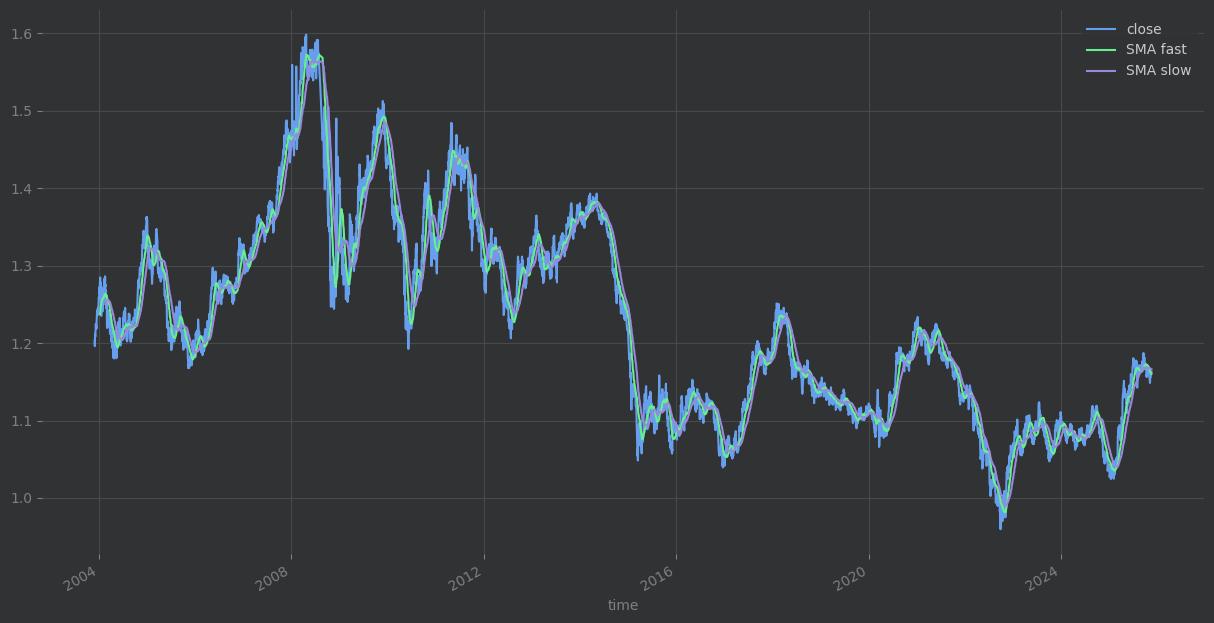

In [68]:
# Plot the results
df[["close", "SMA fast", "SMA slow"]].plot(figsize=(15,8))

<Axes: xlabel='time'>

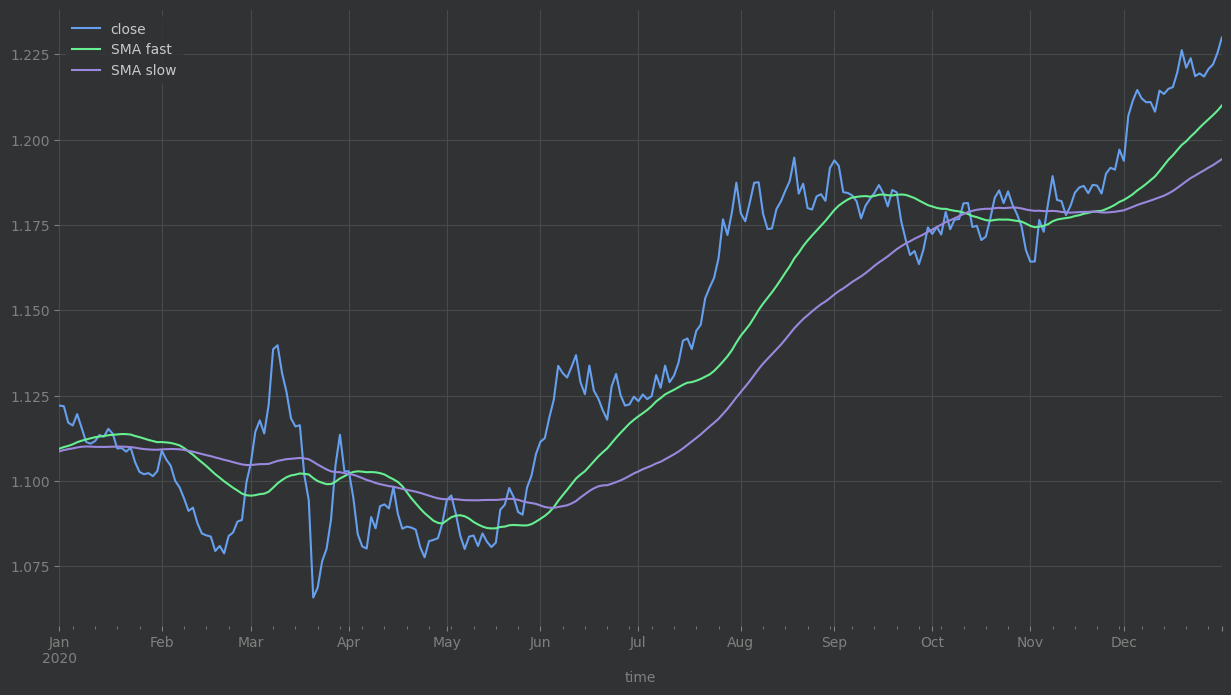

In [69]:
# Plot the results
df[["close", "SMA fast", "SMA slow"]].loc["2020"].plot(figsize=(15,8))

# Estrategia

In [70]:
df["position"]=np.nan

# Create the condition
df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1

# Verificación gráfica

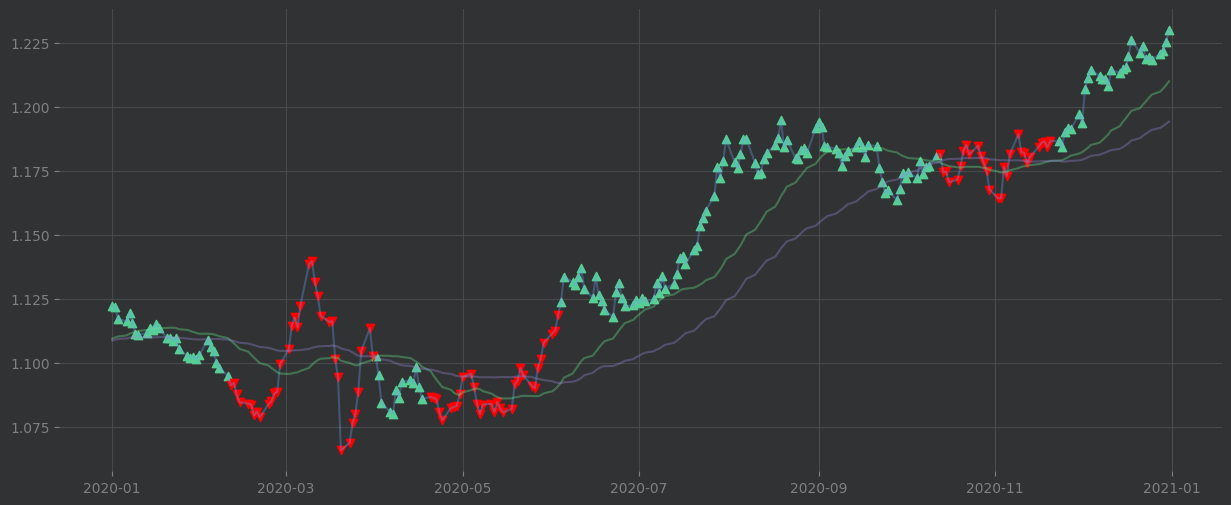

In [71]:
# Representamos toda la señal para asegurarnos de que sea correcta

year="2020"

# Seleccionar toda la señal en una lista de índices para representar sólo estos puntos
idx_open = df.loc[df["position"] == 1].loc[year].index
idx_close = df.loc[df["position"] == -1].loc[year].index



# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Representar los puntos de la señal larga 'open' en verde y la 'sell' en rojo
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color= "red", marker="v")


# Representar la resistencia para asegurarse de que las condiciones se completan
plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35)



# Mostrar el gráfico
plt.show()

# Calcular las ganancias

<Axes: xlabel='time'>

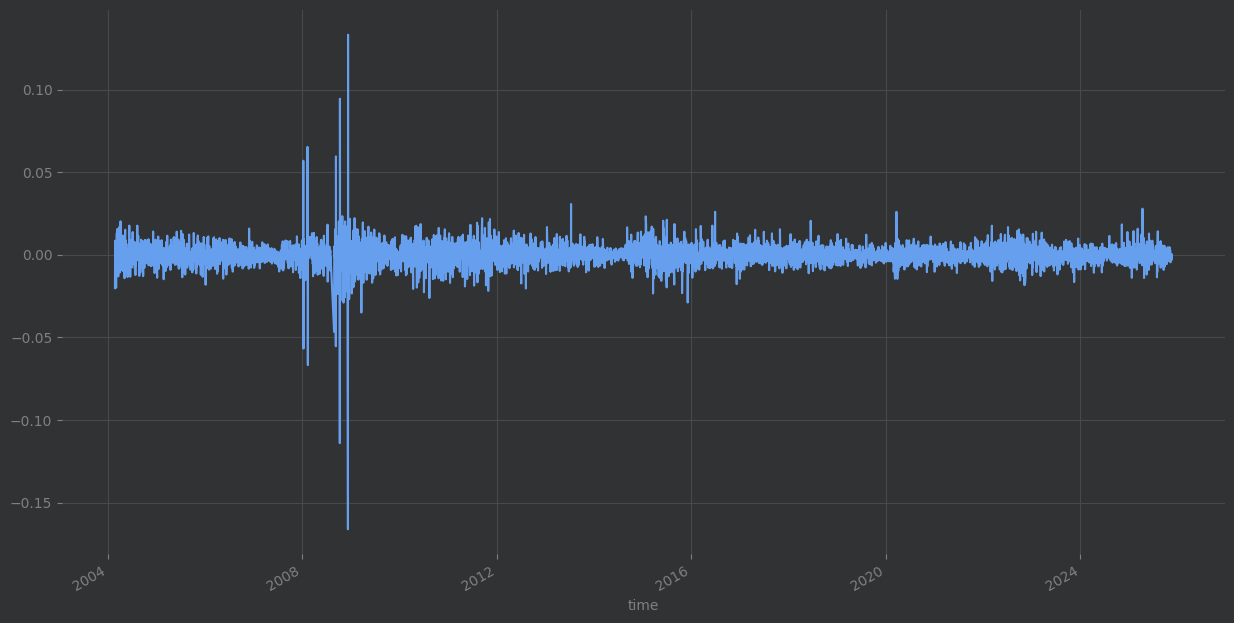

In [72]:
# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad (retorno) de la estrategia
df["return"] = df["pct"] * df["position"].shift(1)


df["return"].plot(figsize=(15,8))

In [73]:
# Balance dirario (1%, 3%, -1%, -2%, 2%, 3%) -- > Balance acumulado (1%, 4%, 3%, 1%, 3%, 6%)

<Axes: xlabel='time'>

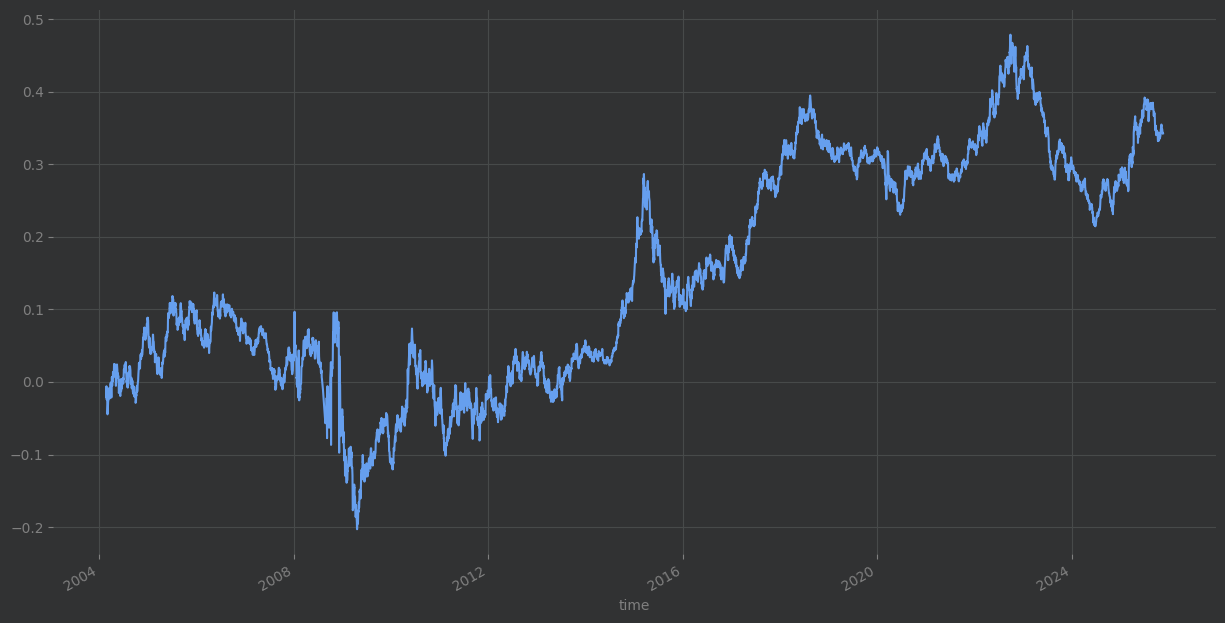

In [74]:
df["return"].cumsum().plot(figsize=(15,8))

# Automatización

In [75]:
def SMA_strategy(input, mt5=False, yf=False):

  if mt5:
    df = preprocessing(input)

  if yf:
    df = preprocessing_yf(input)


  # Crear resistencia mediante un máximo rodante
  df["SMA fast"] = df["close"].rolling(30).mean()

  # Crear soporte mediante un mínimo rodante
  df["SMA slow"] = df["close"].rolling(60).mean()

  df["position"] = np.nan

  # Crear la condición
  df.loc[(df["SMA fast"] > df["SMA slow"]) , "position"] = 1
  df.loc[(df["SMA fast"] < df["SMA slow"]) , "position"] = -1

  df["pct"] = df["close"].pct_change(1)

  # Calcular la rentabilidad de la estrategia

  df["return"] = df["pct"] * (df["position"].shift(1))


  return df["return"]

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='time'>

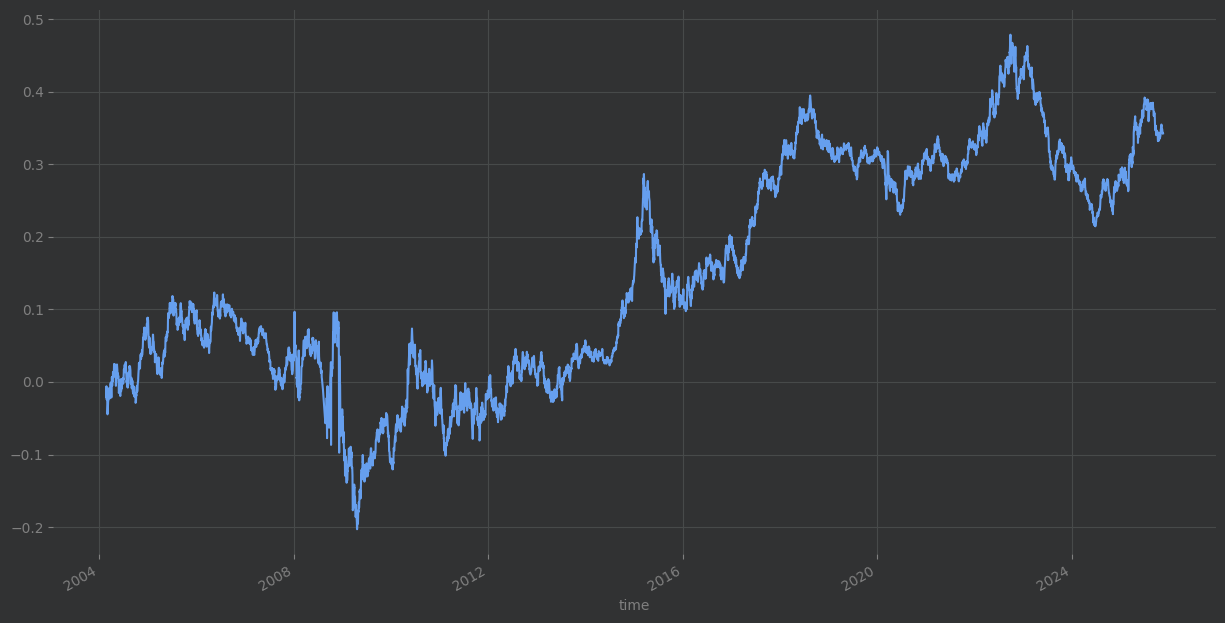

In [76]:
SMA_strategy("EURUSD=X", yf=True).cumsum().plot(figsize=(15,8))

# Comparar la estrategia con diferentes datos

<Axes: xlabel='time'>

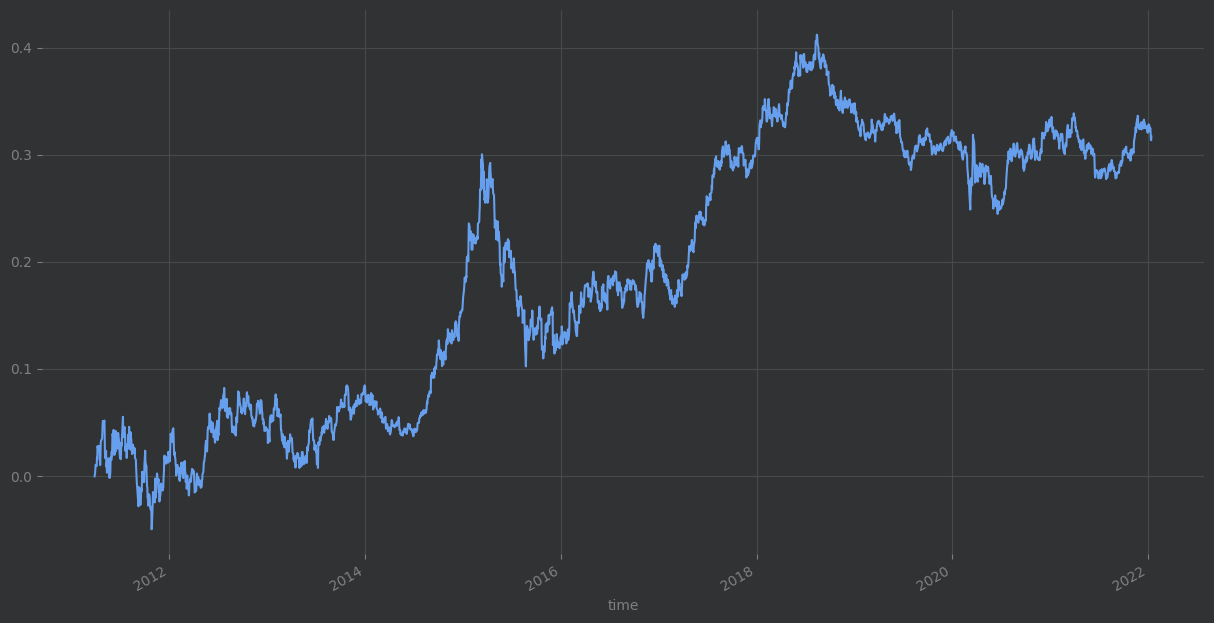

In [77]:
SMA_strategy("/content/EURUSD_D1.csv", mt5=True).cumsum().plot(figsize=(15,8))

[*********************100%***********************]  1 of 1 completed


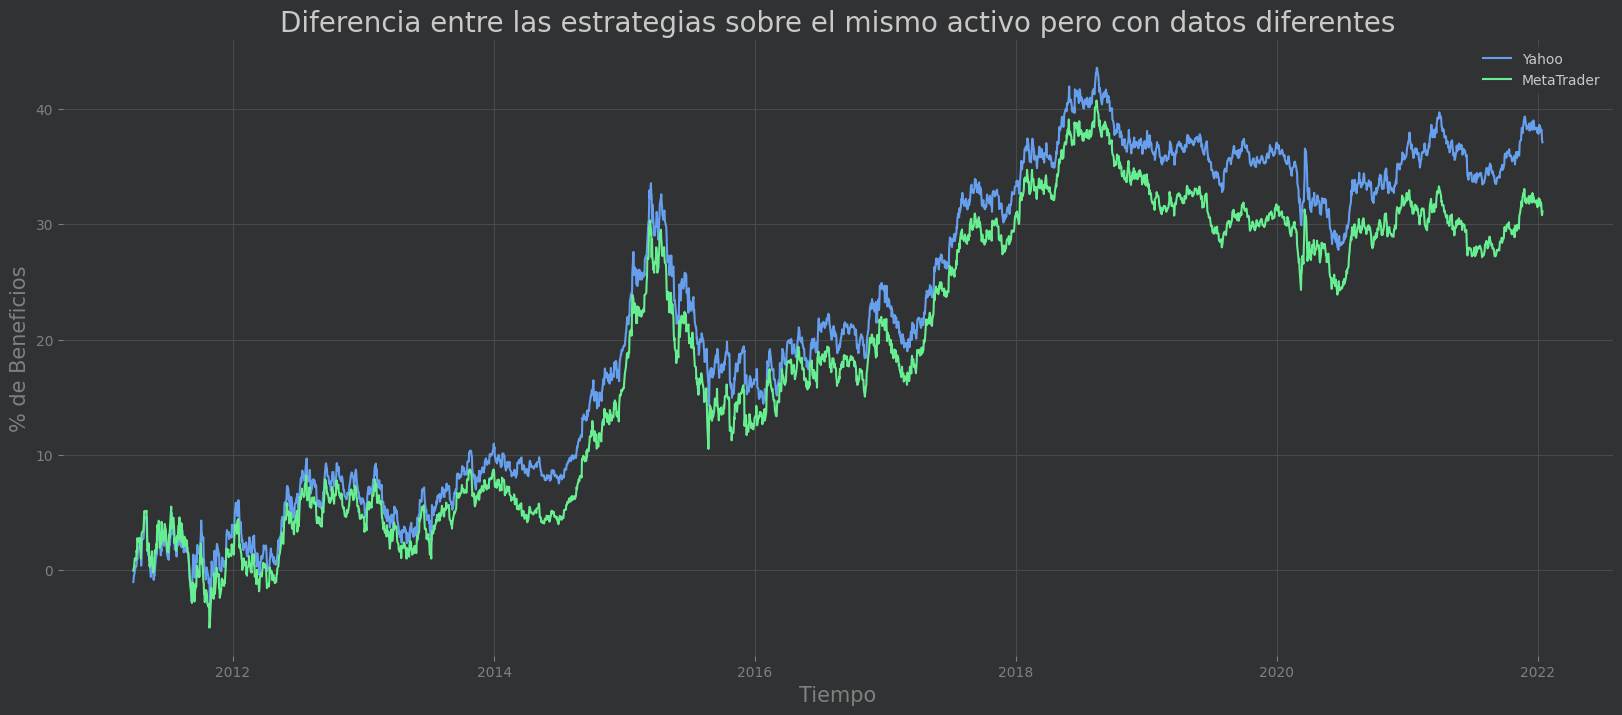

In [78]:
# La misma estrategia pero con diferentes activos
yahoo = SMA_strategy("EURUSD=X", yf=True)
metatrader = SMA_strategy("EURUSD_D1.csv", mt5=True)

returns = pd.DataFrame([yahoo, metatrader], index=["Yahoo",
                                                   "Broker"]).transpose().dropna().cumsum(axis=0)

# Representar el gráfico

# Adaptar el tamaño
plt.figure(figsize=(20,8))

# Representar el retorno
plt.plot(returns["Yahoo"]*100, label="Yahoo")
plt.plot(returns["Broker"]*100, label="MetaTrader")

# Título y nombre de los ejes
plt.xlabel("Tiempo", size=15)
plt.ylabel("% de Beneficios", size=15)
plt.title("Diferencia entre las estrategias sobre el mismo activo pero con datos diferentes", size=20)


# Leyenda
plt.legend()
plt.show()